# KarriereAI
#### A deep learning model used to predict viable career paths to a user based on their skills and interests.

#### Purpose
KarriereAI will classify the appropriate career within technology for a user from an interactive quizlet input. The quizlet is used to determine the user's skills and interests, before the model will predict a fitting career based on the input data.

#### Dataset
The dataset to be used is "The AI-based Career Recommendation System" set, created by Adil Shamim accessed <a href="https://www.kaggle.com/datasets/adilshamim8/ai-based-career-recommendation-system">here on Kaggle</a>. Containing three relevant columns describing skills, interests and recommended career, it will work fine for the model despite being synthetically created data.

#### Model Architecture
The model is a feed-forward neural network for classification, using a multi-layer-perceptron (MLP) architecture suitable for structured data classification.

Parts of engineering this model involves selecting between basic vs. deep MLP architecures. Additionally, figuring out whether the model should contain batch normalization, regularization and/or dropout. Lastly, experimenting with different activation functions.

Using natural language processing (NLP) methods, the data will be vectorized to work as a classifier rather than a language model.

#### Evaluation
As far as evaluation goes, a confusion matrix and an F1 score will be computed along with standard evaluation metrics like accuracy, recall and precision.

*Disclaimer: As of right now, none of the predictions reflects any real life scenarios.*

### Step 1 - Importing Libraries and Loading the Data 
We will be needing different libraries from <a href="https://keras.io/api/">Keras</a> and <a href="https://www.tensorflow.org/api_docs/python/tf">TensorFlow</a> to make computations on the dataset.

In [42]:
# Python
import sys

# Scikit-learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Other
import numpy
import pandas
import os
from pathlib import Path
import seaborn
seaborn.set_theme(style="whitegrid")
from scipy import sparse
from scipy.sparse import hstack
import tensorflow
import keras
from keras import layers, Sequential
import datetime
%load_ext tensorboard

# For plotting
%matplotlib inline
import matplotlib as plot
import matplotlib.pyplot as pyplot

#
from sklearn.metrics import confusion_matrix

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


After importing relevant libraries, we load the dataset we wish to train the model on.

In [43]:
# Load dataset
data = pandas.read_csv("data/dataset.csv")
data.head()

,CandidateID,Name,Age,Education,Skills,Interests,Recommended_Career,Recommendation_Score
0,1,John Doe,28,Bachelor's,Python;Data Analysis;Machine Learning,Technology;Data Science,Data Scientist,0.95
1,2,Jane Smith,32,Master's,Java;System Design;Cloud Computing,Software Development;AI,Software Engineer,0.90
2,3,Bob Johnson,24,Bachelor's,Graphic Design;UI/UX;Adobe Creative Suite,Arts;Digital Media,UX Designer,0.88
3,4,Emily Davis,26,Bachelor's,Python;Deep Learning;Statistics,Healthcare;AI,AI Researcher,0.93
4,5,Michael Brown,30,Master's,Project Management;Communication;Agile,Business;Management,Project Manager,0.87


### Step 2 - Taking a Look at the Data

To create optimal and smooth-running Python for the model we want to  study the shape of the data.

In [44]:
print("Shape of data:", data.shape, "\n")
print("Information about data:")
data.info()

Shape of data: (200, 8) 

Information about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           200 non-null    int64  
 1   Name                  200 non-null    object 
 2   Age                   200 non-null    int64  
 3   Education             200 non-null    object 
 4   Skills                200 non-null    object 
 5   Interests             200 non-null    object 
 6   Recommended_Career    200 non-null    object 
 7   Recommendation_Score  200 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB


### Step 3 - Exploratory Data Analysis (EDA)

To know what data the model will injest, taking a closer look by constructing plots and 

#### 3.1 Plotting Age Distribution

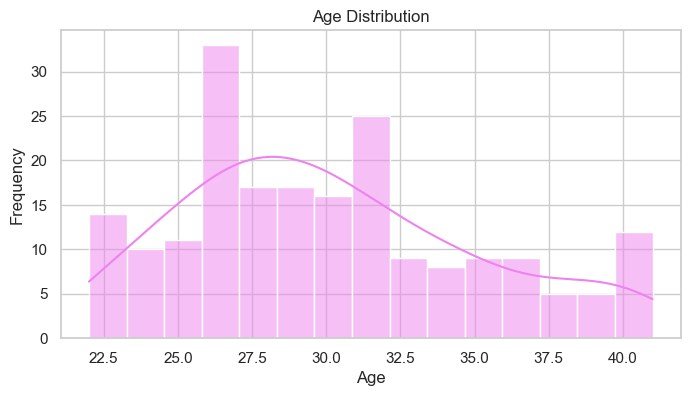

In [45]:
pyplot.figure(figsize=(8, 4))
seaborn.histplot(data['Age'], bins=15, kde=True, color="violet")
pyplot.title("Age Distribution")
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()

#### 3.2 Plotting Education Levels

C:\Users\arege\AppData\Local\Temp\ipykernel_7064\3565661205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(x="Education", data=data, palette=["#DD6FEE", "#EEDD6F", "#6FEEDD"])


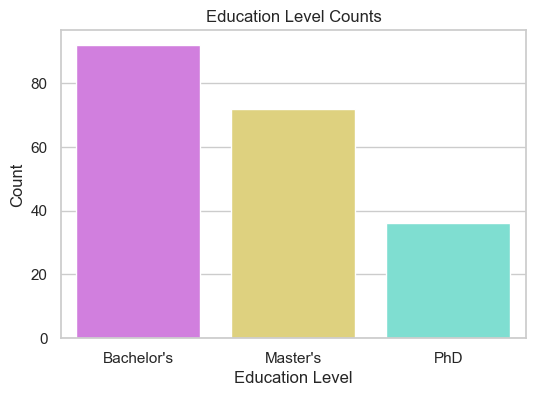

In [46]:
pyplot.figure(figsize=(6, 4))
seaborn.countplot(x="Education", data=data, palette=["#DD6FEE", "#EEDD6F", "#6FEEDD"])
pyplot.title("Education Level Counts")
pyplot.xlabel("Education Level")
pyplot.ylabel("Count")
pyplot.show()

#### 3.3 Plotting Recommended Careers

C:\Users\arege\AppData\Local\Temp\ipykernel_7064\2801120555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(y="Recommended_Career", data=data, order=data["Recommended_Career"].value_counts().index, palette=["#DD6FEE", "#EEDD6F", "#6FEEDD"])
C:\Users\arege\AppData\Local\Temp\ipykernel_7064\2801120555.py:2: UserWarning: 
The palette list has fewer values (3) than needed (32) and will cycle, which may produce an uninterpretable plot.
  seaborn.countplot(y="Recommended_Career", data=data, order=data["Recommended_Career"].value_counts().index, palette=["#DD6FEE", "#EEDD6F", "#6FEEDD"])


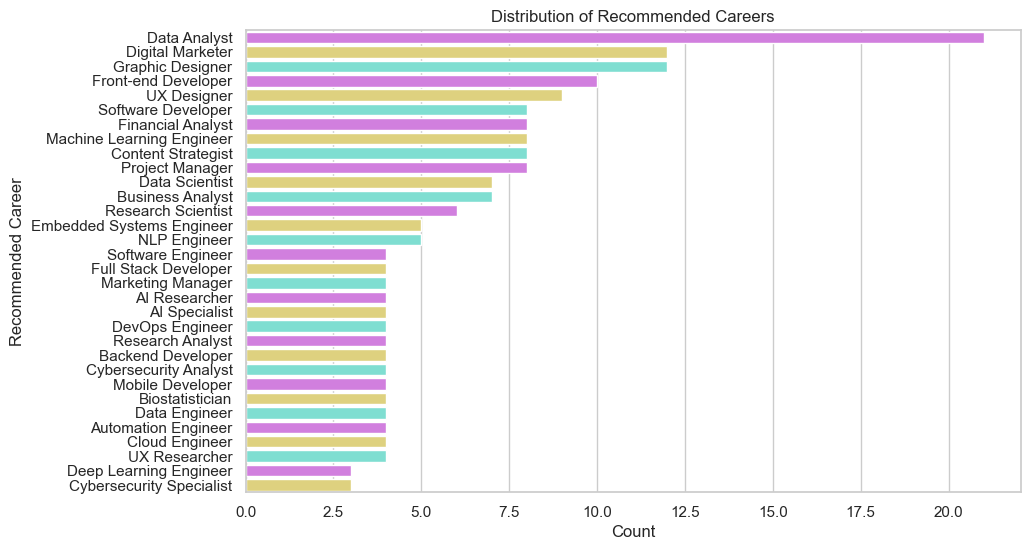

In [47]:
pyplot.figure(figsize=(10, 6))
seaborn.countplot(y="Recommended_Career", data=data, order=data["Recommended_Career"].value_counts().index, palette=["#DD6FEE", "#EEDD6F", "#6FEEDD"])
pyplot.title("Distribution of Recommended Careers")
pyplot.xlabel("Count")
pyplot.ylabel("Recommended Career")
pyplot.show()

#### 3.4 Plotting Recommendation Scores

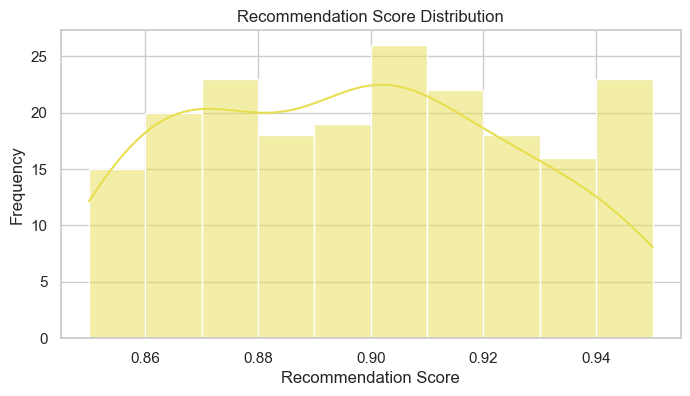

In [48]:
pyplot.figure(figsize=(8, 4))
seaborn.histplot(data['Recommendation_Score'], bins=10, kde=True, color="#e7de50")
pyplot.title("Recommendation Score Distribution")
pyplot.xlabel("Recommendation Score")
pyplot.ylabel("Frequency")
pyplot.show()

#### 3.5 Plotting Skills and Interests
##### 3.5.1 Skills

In [49]:
# Function to split semicolon-separated values and count occurrences
def count_items(series):
    items = series.dropna().apply(lambda x: x.split(";"))
    flat_list = [item.strip() for sublist in items for item in sublist]
    return pandas.Series(flat_list).value_counts()

In [50]:
# Count Skills
skills_count = count_items(data["Skills"])
print("Most Common Skills:\n", skills_count)

Most Common Skills:
 Python              75
Machine Learning    23
SEO                 20
JavaScript          19
Java                18
                    ..
UX/UI                1
Adobe XD             1
Cybersecurity        1
Content Strategy     1
NLP                  1
Name: count, Length: 80, dtype: int64


C:\Users\arege\AppData\Local\Temp\ipykernel_7064\1423006372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=skills_count.index, y=skills_count.values, palette="viridis")


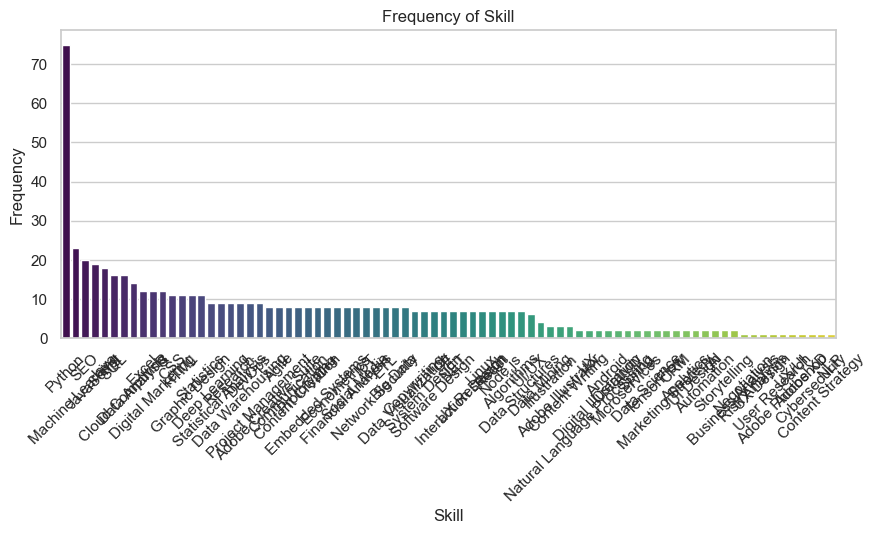

In [51]:
# Plot skills count
pyplot.figure(figsize=(10, 4))
seaborn.barplot(x=skills_count.index, y=skills_count.values, palette="viridis")
pyplot.xticks(rotation=45)
pyplot.title("Frequency of Skill")
pyplot.xlabel("Skill")
pyplot.ylabel("Frequency")
pyplot.show()

##### 3.5.2 Interests

In [52]:
# Count Interests
interests_count = count_items(data["Interests"])
print("Most Common Interests:\n", interests_count)

Most Common Interests:
 Technology              48
AI                      28
Business                28
Finance                 27
Design                  23
Marketing               23
Analytics               19
Academia                16
Arts                    16
Data Science            16
Web Development         16
Healthcare              14
Management              14
Software Development    13
Digital Media           13
Research                13
Cybersecurity           12
Communications          12
Biotech                  6
Data Analysis            5
Innovation               4
Automation               3
Electronics              3
Software Engineering     3
Linguistics              2
Coding                   2
Social Media             2
Statistics               2
Gaming                   2
Web Design               2
Content                  2
Engineering              2
Media                    2
Mobile Apps              2
User Experience          2
Security                 1
Data

C:\Users\arege\AppData\Local\Temp\ipykernel_7064\4167769676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=interests_count.index, y=interests_count.values, palette="magma")


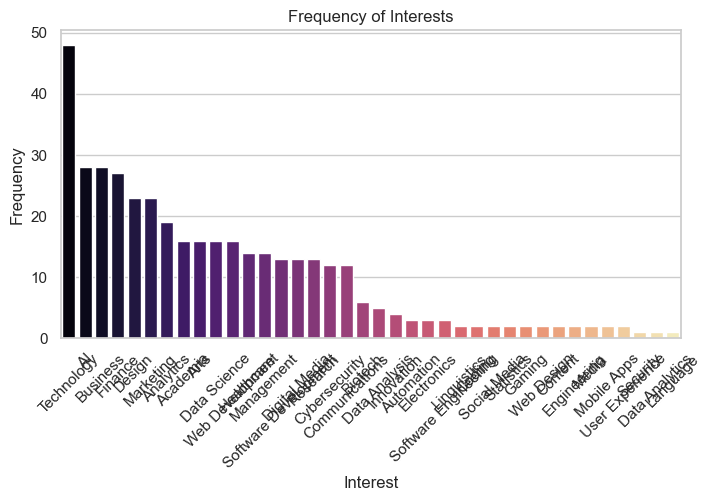

In [53]:
# Plot interests count
pyplot.figure(figsize=(8, 4))
seaborn.barplot(x=interests_count.index, y=interests_count.values, palette="magma")
pyplot.xticks(rotation=45)
pyplot.title("Frequency of Interests")
pyplot.xlabel("Interest")
pyplot.ylabel("Frequency")
pyplot.show()

### Step 4: Preprocessing of Data

For the purpose of cleaning the dataset to make sure the model doesn't learn errors making predictions skewed.

#### 4.1 Feature Selection

Checking for missing values and dropping them if they few enough to make less of an impact. Luckily for us, there are no missing values in this dataset.

In [54]:
missing_values = data.isnull().sum()
print ('Missing Values in Each Column')
print (missing_values)

Missing Values in Each Column
CandidateID             0
Name                    0
Age                     0
Education               0
Skills                  0
Interests               0
Recommended_Career      0
Recommendation_Score    0
dtype: int64


Selection of columns to be used:
- Skills
- Interests
- Age (potentially)

Target Column for Predictions:
- Recommended Career

In [55]:
# Define features to be used
features = data [['Skills', 'Interests', 'Age']]
target = data ['Recommended_Career']

In [56]:
print ("Number of careers:", target.unique().size)

Number of careers: 32


#### 4.2 Process Text Fields
Turning skills and interests into vectorized numerical features for classification.

In [57]:
# Creating a combined text column
features['Text_Features'] = features ['Skills'].fillna('') + ' ' + features ['Interests'].fillna('')

# Text Feature Extraction
vectorizer = CountVectorizer (tokenizer = lambda x: [item.strip() for item in x.split(";") if item.strip()], lowercase = True)

text_features = vectorizer.fit_transform(features['Text_Features'])

# # Text based matrix from Skills
# skills_matrix = vectorizer.fit_transform (features ['Skills'])

# # Text based matrix from Interests
# interests_matrix = vectorizer.fit_transform (features ['Interests'])

# # Numeric matrix from Age
# age_matrix = features['Age'].values

# skills_and_interests_matrix = vectorizer.fit_transform (features ['Skills_and_Interests'])
print ("Shape of text features:", text_features.shape)

Shape of text features: (200, 150)


C:\Users\arege\AppData\Local\Temp\ipykernel_7064\2984523955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Text_Features'] = features ['Skills'].fillna('') + ' ' + features ['Interests'].fillna('')
c:\Users\arege\Documents\Dataingenior Bachelor\DAT255\KarriereAI\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### 4.3 Constructing the Feature Matrix

Combining the numerical value of Age with the vectorized Skills and Interest features into a sparse matrix concatenation.

In [58]:
from sklearn.preprocessing import LabelEncoder

# Numeric matrix from Age
age_matrix = features[['Age']].values # ? Updated to double-bracket

# Combining the matrices
feature_matrix = hstack ([sparse.csr_matrix (age_matrix), text_features]) # X
coo = feature_matrix.tocoo()
indices = numpy.asmatrix([coo.row, coo.col]).transpose()
feature_matrix = tensorflow.SparseTensor(indices, coo.data, coo.shape)

# Encoding target variable
target_encoder = LabelEncoder ()
encoded_target = target_encoder.fit_transform (target) # Y

print ("Feature Matrix Shape:", feature_matrix.shape) # X
print ("Target Classes:", target_encoder.classes_) # Y

Feature Matrix Shape: (200, 151)
Target Classes: ['AI Researcher' 'AI Specialist' 'Automation Engineer' 'Backend Developer'
 'Biostatistician' 'Business Analyst' 'Cloud Engineer'
 'Content Strategist' 'Cybersecurity Analyst' 'Cybersecurity Specialist'
 'Data Analyst' 'Data Engineer' 'Data Scientist' 'Deep Learning Engineer'
 'DevOps Engineer' 'Digital Marketer' 'Embedded Systems Engineer'
 'Financial Analyst' 'Front-end Developer' 'Full Stack Developer'
 'Graphic Designer' 'Machine Learning Engineer' 'Marketing Manager'
 'Mobile Developer' 'NLP Engineer' 'Project Manager' 'Research Analyst'
 'Research Scientist' 'Software Developer' 'Software Engineer'
 'UX Designer' 'UX Researcher']


### Step 5 - Building the Model

Building the FFN model, and training it on training and validation sets.

#### 5.1 Training, Validation and Test Sets

In [59]:
from sklearn.model_selection import train_test_split

print (type(feature_matrix), type(encoded_target))

X_train = feature_matrix 
y_train = encoded_target 

X_train = tensorflow.sparse.reorder(X_train)

# X_train, X_test, y_train, y_test = train_test_split (feature_matrix, encoded_target, test_size = 0.2, random_state = 42)

# tensorflow.sparse.reorder(X_train)

# this is trash:
# training_set, validation_set, test_set = train_val_test_split (age_matrix, feature_matrix, )
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'tensorflow.python.framework.sparse_tensor.SparseTensor'> <class 'numpy.ndarray'>


#### 5.2 Training the Model

In [69]:
# Remove previous logs
# TODO

In [61]:
model = Sequential([
    keras.Input(shape = (feature_matrix.shape[1], )),
    layers.Dropout(0.1),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(target.unique().size)
])

# model.compile(loss = 'mse', optimizer = 'sgd')
model.compile(loss = 'log_cosh', 
              optimizer = 'adam', 
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, 
          epochs = 30, 
          batch_size = 1, 
          validation_split = 0.2,
          callbacks=[tensorboard_callback])

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0349 - loss: 13.3305 - val_accuracy: 0.0250 - val_loss: 7.3151
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0282 - loss: 7.8996 - val_accuracy: 0.0750 - val_loss: 7.0659
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0639 - loss: 7.3908 - val_accuracy: 0.1250 - val_loss: 7.1205
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0117 - loss: 7.9090 - val_accuracy: 0.1250 - val_loss: 7.0153
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0487 - loss: 7.1551 - val_accuracy: 0.1000 - val_loss: 7.0659
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0426 - loss: 6.8866 - val_accuracy: 0.0750 - val_loss: 7.0613
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0282 - loss: 6.8334 - val_accuracy: 0.0500 - val_loss: 6.9760
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0040 - loss: 6.9159 - val_accuracy: 0

In [ ]:
%tensorboard --logdir logs/fit

### Step 6 - Evaluation

#### 6.1 Confusion Matrix

In [65]:
# Predict on the test set
# y_pred = model.predict(X_train)

In [66]:
# # Confusion matrix
# cm = confusion_matrix(y_train, y_pred)
# plot.figure(figsize = (10, 8))
# seaborn.heatmap(cm, annot = True, fmt = "d", cmap = "Blues",
#             xticklabels = target_encoder.classes_,
#             yticklabels = target_encoder.classes_)
# plot.xlabel("Predicted")
# plot.ylabel("Actual")
# plot.title("Confusion Matrix")
# plot.show()

#### 6.2 F1-Score

#### 6.3 Precision, Accuracy, Recall